In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


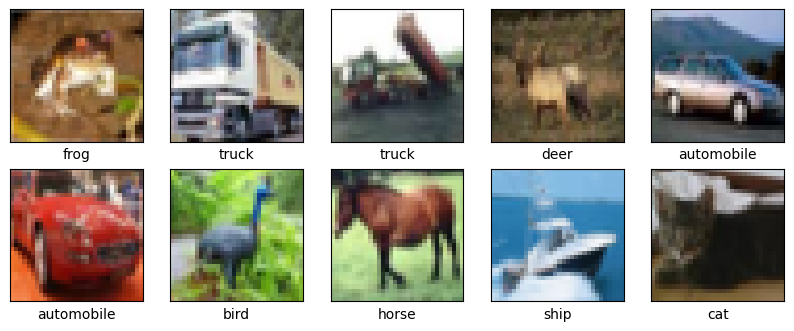

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i])
 plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 10
h = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels), batch_size=128)

Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 1.6527 - accuracy: 0.3983 - val_loss: 1.3552 - val_accuracy: 0.5042
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 1.2700 - accuracy: 0.5478 - val_loss: 1.2104 - val_accuracy: 0.5772
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 1.1171 - accuracy: 0.6059 - val_loss: 1.0739 - val_accuracy: 0.6202
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 1.0077 - accuracy: 0.6444 - val_loss: 1.0217 - val_accuracy: 0.6420
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 0.9383 - accuracy: 0.6731 - val_loss: 0.9495 - val_accuracy: 0.6679
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 0.8718 - accuracy: 0.6960 - val_loss: 0.9055 - val_accuracy: 0.6867
Epoch 7/10
391/391 [==============================] - 13s 34ms/step - loss: 0.8290 - accuracy: 0.7104 - val_loss: 0.9179 - val_accuracy:

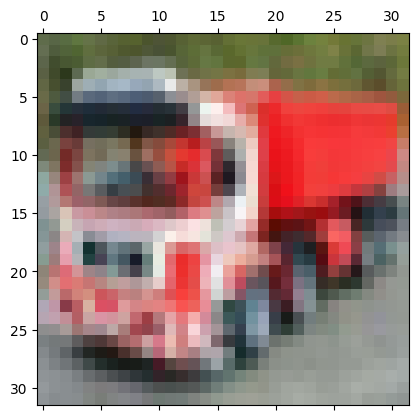

In [7]:
plt.matshow(test_images[666])

In [8]:
predictions = model.predict(test_images, batch_size=128)

79/79 [==============================] - 1s 13ms/step


In [11]:
import numpy as np
np.argmax(predictions[666])

9

In [13]:
!pip install seaborn

In [14]:
import seaborn as sns

In [15]:
y_predicted_labels = [np.argmax(i) for i in predictions]
y_predicted_labels[:5]


[3, 8, 9, 8, 6]

<Axes: >

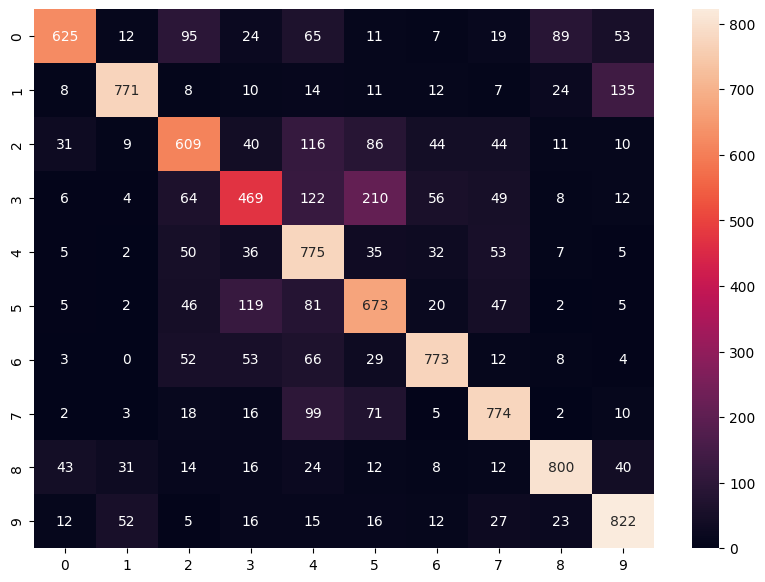

In [16]:
cm = tf.math.confusion_matrix(test_labels, y_predicted_labels)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')

In [17]:
model_eval = model.evaluate(test_images, test_labels)
print("Accuracy of model is:", model_eval[1], "%")

313/313 [==============================] - 2s 6ms/step - loss: 0.8476 - accuracy: 0.7091
Accuracy of model is: 0.7091000080108643 %
